In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.learning_curve import validation_curve
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv('nfl_betting_df.csv', index_col = 0)

In [19]:
df['exp_win_difference'] = df.home_exp_win_pct- df.away_exp_win_pct
df = df[df.schedule_season > 1978]

In [20]:
df['total_ppg'] = (df.h_ppg + df.a_ppg)
df['total_points_against'] = (df.h_papg + df.a_papg)
df['last_four_difference'] = (df.home_win_pct_last_4 - df.away_win_pct_last_4)

In [21]:
df[['weather_temperature', 'weather_wind_mph', 'weather_humidity']]=df[['weather_temperature', 'weather_wind_mph', 'weather_humidity']].fillna(value=np.round(df.mean(),3))
df[['over_under_line']]=df[['over_under_line']].fillna(value=(np.round(df.mean()*2)/2))

In [22]:
df = df.fillna(value = 0)

In [23]:
df.index = range(0, len(df))

In [24]:
df.columns

Index(['schedule_season', 'schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'weather_detail', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'score_home', 'score_away', 'point_total',
       'over_under_result', 'score_difference', 'home_id', 'away_id',
       'home_favorite', 'favorite_covered', 'winning_team', 'losing_team',
       'home_wins', 'home_losses', 'home_ties', 'away_wins', 'away_losses',
       'away_ties', 'home_points_for', 'home_points_against',
       'away_points_for', 'away_points_against', 'h_games', 'a_games',
       'home_win_pct', 'away_win_pct', 'win_pct_diff', 'h_ppg', 'h_papg',
       'a_ppg', 'a_papg', 'home_pt_diff_pg', 'away_pt_diff_pg', 'pt_diff_pg',
       'home_exp_win_pct', 'away_exp_win_pct', 'home_win_pct_last_4',
       'away_win_pct_last_4', 'exp_win_difference', 'total_ppg',
       'total_points_against', 'last_four_difference'],
      dtype='object')

In [25]:
reg_df = df[(df.schedule_week > 1) & (df.schedule_week < 19) & (df.schedule_season>2001)]
week5_df = df[(df.schedule_week > 4) & (df.schedule_week < 19) & (df.schedule_season>2001)]

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


-4.407883999999999

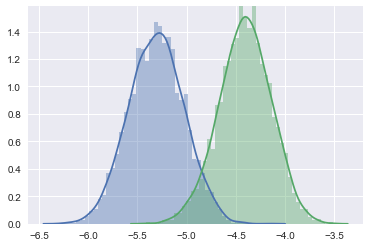

In [213]:
spread_samples = np.random.choice(week5_df.spread_favorite,25)
sample_means = spread_samples.mean()

def n_samples(arr,sample_size,n_samples):
    size = sample_size
    sample_means=[]
    
    for n in range(n_samples):
        sample_means.append(np.random.choice(arr,size).mean())
    
    return sample_means

x = n_samples(week5_df.spread_favorite,25,1000)

#sns.distplot(x)

ax1 = n_samples(week5_df.spread_favorite[(week5_df.spread_favorite>-12.5) & (week5_df.home_favorite==1)],100,5000)
ax2 = n_samples(week5_df.spread_favorite[(week5_df.spread_favorite>-12.5) & (week5_df.home_favorite==0)],100,5000)
sns.distplot(ax1)
sns.distplot(ax2)
sum(week5_df.spread_favorite<-12.5)/len(week5_df)
np.sum(ax1)/len(ax1)
np.sum(ax2)/len(ax2)

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


7.375

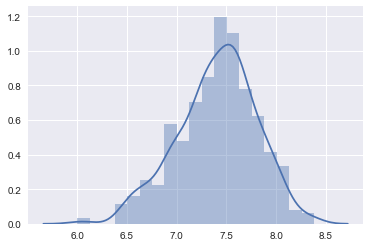

In [206]:
t = [9,9,9,9,9,9,1,4]
sns.distplot(n_samples(t,50,500))
np.sum(t)/len(t)

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-10, 0)

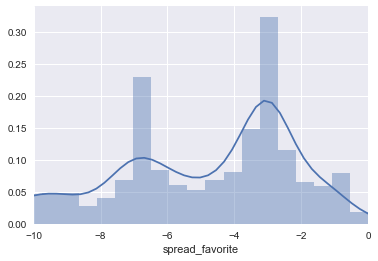

In [211]:
rw5 = np.random.choice(week5_df.spread_favorite,10)

ax = sns.distplot(week5_df.spread_favorite)
ax.set_xlim(-10,0)

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



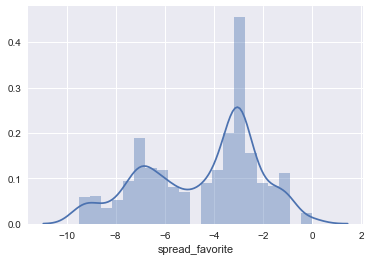

In [1019]:
sns.distplot((reg_df.spread_favorite[reg_df['spread_favorite']>-10]))

In [1020]:
reg_df['spread_favorite'].median()

-4.5

In [1021]:
reg_df.columns

Index(['schedule_season', 'schedule_week', 'team_home', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'weather_detail', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'score_home', 'score_away', 'point_total',
       'over_under_result', 'score_difference', 'home_id', 'away_id',
       'home_favorite', 'favorite_covered', 'winning_team', 'losing_team',
       'home_wins', 'home_losses', 'home_ties', 'away_wins', 'away_losses',
       'away_ties', 'home_points_for', 'home_points_against',
       'away_points_for', 'away_points_against', 'h_games', 'a_games',
       'home_win_pct', 'away_win_pct', 'win_pct_diff', 'h_ppg', 'h_papg',
       'a_ppg', 'a_papg', 'home_pt_diff_pg', 'away_pt_diff_pg', 'pt_diff_pg',
       'home_exp_win_pct', 'away_exp_win_pct', 'home_win_pct_last_4',
       'away_win_pct_last_4', 'exp_win_difference', 'total_ppg',
       'total_points_against', 'last_four_difference'],
      dtype='object')

In [1022]:
pivot = reg_df.pivot_table(index='spread_favorite', columns='favorite_covered',
                    aggfunc={'favorite_covered':len}, fill_value = 0)

In [1023]:
pivot['row_total'] = 0
for index, row in pivot.iterrows():
    row.row_total = sum(row)

In [1024]:
covered = pivot.favorite_covered[1]
no_cover = pivot.favorite_covered[0]
push = pivot.favorite_covered[2]

In [1025]:
spreads = sorted(set(reg_df.spread_favorite))
x = np.array([spread for spread in spreads if spread > -15 and spread < 0])

In [1026]:
y_covered = [covered[value]/pivot['row_total'][value] for value in x]
y_no_cover = [no_cover[value]/pivot['row_total'][value] for value in x]
y_push = [push[value]/pivot['row_total'][value] for value in x]

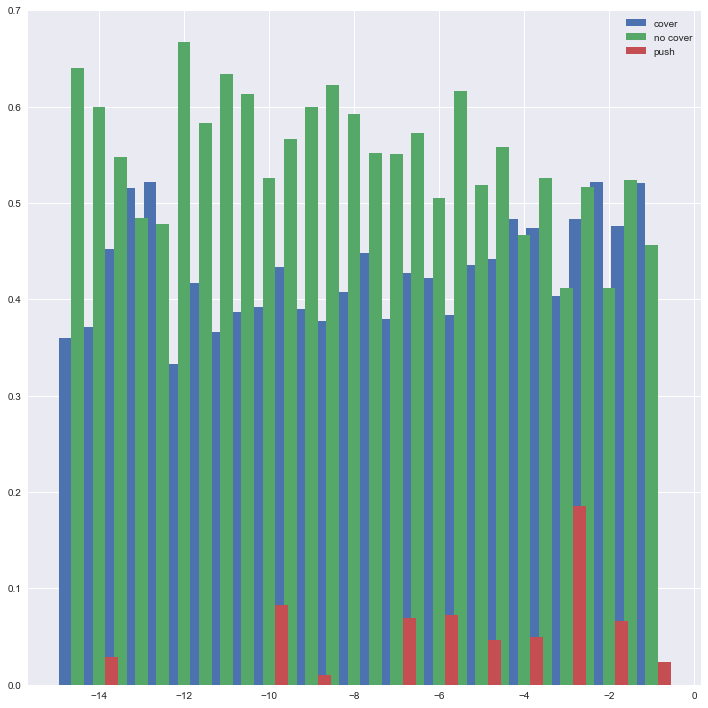

In [1027]:
plt.figure(figsize = (10,10))
plt.bar(x-.3,y_covered, label = 'cover', width = .3)
plt.bar(x,y_no_cover, label = 'no cover', width = .3)
plt.bar(x+.3,y_push, label = 'push', width = .3)
plt.legend()
plt.tight_layout()
plt.show()

In [1028]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=x,
    y=y_covered,
    name='Covered'
)
trace2 = go.Bar(
    x=x,
    y=y_no_cover,
    name='No Cover'
)

trace3 = go.Bar(
    x=x,
    y=y_push,
    name='Push'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [1029]:
x = reg_df.corr()
x_dict = x['over_under_line'].to_dict()
sorted_dict = sorted(x_dict.items(), key = lambda x:x[1])
sorted_dict

[('weather_wind_mph', -0.27814438839587063),
 ('away_losses', -0.09181107897061887),
 ('home_losses', -0.08261468736976238),
 ('weather_humidity', -0.07296270790762051),
 ('favorite_covered', -0.06089438793056482),
 ('home_favorite', -0.04783828371692238),
 ('spread_favorite', -0.02676209774446886),
 ('schedule_week', -0.01590567168302309),
 ('h_games', -0.013207615072821465),
 ('a_games', -0.012557184401268516),
 ('home_ties', -0.009323614004445693),
 ('pt_diff_pg', -0.009019590703124431),
 ('exp_win_difference', -0.0027615639900368705),
 ('win_pct_diff', -0.0016914052458963243),
 ('last_four_difference', 0.0008104096904615186),
 ('score_difference', 0.004869988893768626),
 ('away_ties', 0.0285009517966309),
 ('home_wins', 0.06290691375775394),
 ('away_wins', 0.07262458799908296),
 ('away_points_against', 0.07738696378310155),
 ('home_points_against', 0.09375010316977914),
 ('away_win_pct_last_4', 0.10290023606164597),
 ('home_win_pct_last_4', 0.10353097316603686),
 ('home_win_pct', 0

In [1030]:
reg_df

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,...,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,home_win_pct_last_4,away_win_pct_last_4,exp_win_difference,total_ppg,total_points_against,last_four_difference
5387,2002,2,Atlanta Falcons,Chicago Bears,ATL,-2.5,45.0,DOME,72.0,0.0,...,4.000,-7.000,0.368063,0.719232,0.00,0.25,-0.351169,61.00,60.00,-0.25
5388,2002,2,Baltimore Ravens,Tampa Bay Buccaneers,TB,-4.5,32.0,0,73.0,8.0,...,-6.000,3.000,0.180159,0.181480,0.00,0.00,-0.001321,27.00,36.00,0.00
5389,2002,2,Carolina Panthers,Detroit Lions,CAR,-3.0,35.5,0,70.0,10.0,...,-28.000,31.000,0.819841,0.004504,0.25,0.00,0.815337,31.00,56.00,0.25
5390,2002,2,Cleveland Browns,Cincinnati Bengals,CLE,-3.5,39.0,0,72.0,10.0,...,-28.000,27.000,0.458620,0.000068,0.00,0.00,0.458552,45.00,74.00,0.00
5391,2002,2,Dallas Cowboys,Tennessee Titans,TEN,-3.5,37.5,0,79.0,12.0,...,3.000,-12.000,0.037651,0.666962,0.00,0.25,-0.629311,37.00,43.00,-0.25
5392,2002,2,Indianapolis Colts,Miami Dolphins,PICK,0.0,47.0,DOME,72.0,0.0,...,28.000,-25.000,0.662566,0.995496,0.25,0.25,-0.332930,77.00,46.00,0.00
5393,2002,2,Kansas City Chiefs,Jacksonville Jaguars,KC,-3.5,46.0,0,67.0,9.0,...,-3.000,4.000,0.541380,0.337434,0.25,0.00,0.203946,65.00,67.00,0.25
5394,2002,2,Minnesota Vikings,Buffalo Bills,MIN,-3.5,49.0,DOME,72.0,0.0,...,-6.000,2.000,0.280768,0.246090,0.00,0.00,0.034678,54.00,64.00,0.00
5395,2002,2,New Orleans Saints,Green Bay Packers,GB,-2.5,45.5,DOME,72.0,0.0,...,3.000,3.000,0.818520,0.631937,0.25,0.25,0.186584,63.00,54.00,0.00
5396,2002,2,New York Jets,New England Patriots,NYJ,-1.0,41.0,0,75.0,13.0,...,16.000,-10.000,0.753910,0.986939,0.25,0.25,-0.233029,67.00,45.00,0.00


In [1031]:
reg_df.describe()

,schedule_season,schedule_week,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,point_total,...,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,home_win_pct_last_4,away_win_pct_last_4,exp_win_difference,total_ppg,total_points_against,last_four_difference
count,3841.000000,3841.000000,3841.000000,3841.000000,3841.00000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,...,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000,3841.000000
mean,2009.501953,9.651914,-5.419943,43.199948,59.83598,6.247852,65.391817,23.253840,20.697214,43.951054,...,0.306306,-0.581775,0.489658,0.512084,0.409691,0.427428,-0.022467,43.668854,43.637272,-0.017736
std,4.611360,4.684961,3.426142,4.713206,15.59030,5.457698,12.433429,10.322451,10.144719,14.066498,...,8.134176,11.366746,0.316927,0.318766,0.276171,0.275013,0.447746,8.266455,7.647113,0.361957
min,2002.000000,2.000000,-26.500000,30.000000,0.00000,0.000000,4.000000,0.000000,0.000000,3.000000,...,-42.000000,-52.000000,0.000000,0.000000,0.000000,0.000000,-0.998244,0.000000,9.000000,-1.000000
25%,2006.000000,6.000000,-7.000000,40.000000,49.00000,1.000000,64.000000,16.000000,13.000000,34.000000,...,-5.000000,-7.667000,0.193552,0.217616,0.250000,0.250000,-0.336171,38.300000,38.890000,-0.250000
50%,2010.000000,10.000000,-4.500000,43.500000,63.00000,6.000000,66.552000,23.000000,20.000000,43.000000,...,0.500000,-0.428000,0.486835,0.529577,0.500000,0.500000,-0.017929,43.500000,43.730000,0.000000
75%,2014.000000,14.000000,-3.000000,46.500000,72.00000,10.000000,68.000000,30.000000,27.000000,53.000000,...,5.571000,6.875000,0.781734,0.812959,0.500000,0.500000,0.289001,48.910000,48.500000,0.250000
max,2017.000000,17.000000,0.000000,60.000000,93.00000,40.000000,100.000000,62.000000,59.000000,106.000000,...,42.000000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,88.000000,1.000000


In [520]:
def poly_regression(x, y, degree_range, xlim_min, xlim_max, ylim_min, ylim_max,xfit1, xfit2, alpha = .75,s = 5,width = 2.5):
    plt.figure(figsize = (10,10))
#     split = train_test_split(x, y)
#     X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
#     x = X_train
#     y = y_train
#     plt.scatter(x, y, s = s, alpha = alpha)
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min,xlim_max)
    if str(y) == str(reg_df.over_under_line):
        y1 = y[reg_df['over_under_result']=='over']
        y2 = y[reg_df['over_under_result']=='under']
        x1 = x[reg_df['over_under_result']=='over']
        x2 = x[reg_df['over_under_result']=='under']
        plt.scatter(x1, y1, s = s, alpha = alpha, color = 'green', label = 'Over')
        plt.scatter(x2, y2, s = s, alpha = .4, color = 'purple', label = 'Under')
    else:
        y1 = y[reg_df['favorite_covered']==1]
        y2 = y[reg_df['favorite_covered']==0]
        x1 = x[reg_df['favorite_covered']==1]
        x2 = x[reg_df['favorite_covered']==0]
        plt.scatter(x1, y1, s = s, alpha = alpha, color = 'green',label = 'Covered')
        plt.scatter(x2, y2, s = s, alpha = .4, color = 'purple', label ='No Cover')
    for degree in degree_range:
        poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
        poly_model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(xfit1,xfit2, 10000)
        yfit = poly_model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label = 'degree={}'.format(degree),linewidth=width)
    plt.legend(loc = 'best')


In [652]:
def regression_evaluation(target, X_list):
    target = target
    X = X_list 
    X2 = sm.add_constant(X)
    # model = sm.ols(formula = 'over_under_line ~ np.power(total_points_against, 1)', data = reg_df).fit()

    est = sm.OLS(target, X2)
    est2 = est.fit()
    
    y_predicted = est2.fittedvalues
    y_actual = target
    rmse = math.sqrt(mean_squared_error(y_actual, y_predicted))
    residuals = y_actual-y_predicted
    
    plt.scatter(y_predicted,residuals)
    check = round(rmse_check(y_predicted, y_actual) - rmse)
    print(est2.summary())
    plt.scatter(y_predicted,residuals)
    
    print('RMSE=' + str(rmse) + ', check =' + str(check))

In [654]:
def rmse_check(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                           #get the ^

# OVER/UNDER

# Variable 1 -Total Points Against

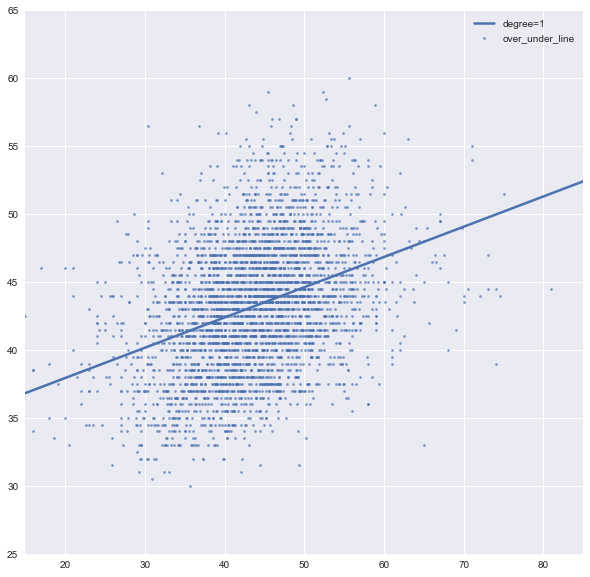

In [1035]:
poly_regression((reg_df.total_points_against), reg_df.over_under_line, [1],15,85, 25, 65,10,150)

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     576.3
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          8.92e-119
Time:                        17:54:19   Log-Likelihood:                -11136.
No. Observations:                3841   AIC:                         2.228e+04
Df Residuals:                    3839   BIC:                         2.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   33.4830 

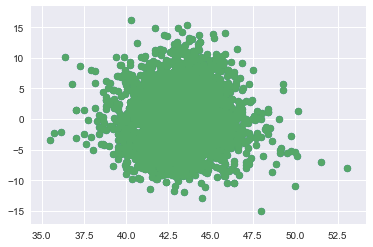

In [1036]:
regression_evaluation(reg_df.over_under_line, reg_df.total_points_against)

# VARIABLE 2 -TOTAL PPG

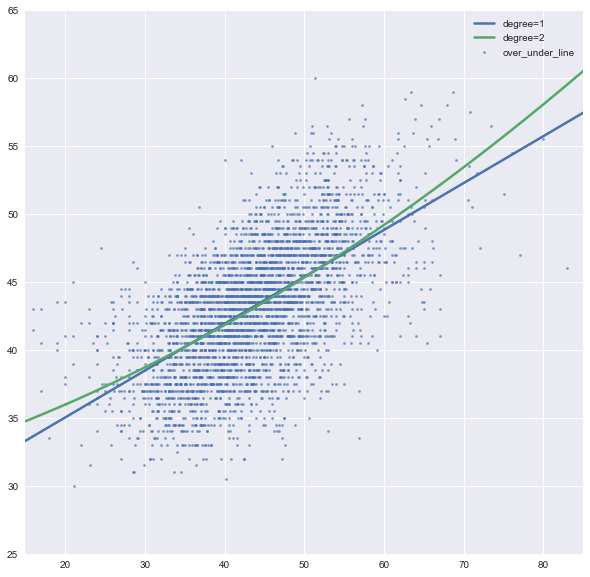

In [1037]:
poly_regression((reg_df.total_ppg), reg_df.over_under_line, [1,2],15,85, 25, 65,10,150)

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     2218.
Date:                Thu, 09 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:54:20   Log-Likelihood:                -10529.
No. Observations:                3841   AIC:                         2.106e+04
Df Residuals:                    3839   BIC:                         2.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1329      0.326     86.404      0.0

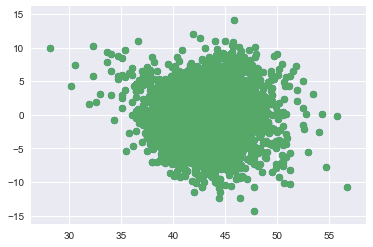

In [1038]:
regression_evaluation(reg_df.over_under_line, (reg_df.total_ppg**1))

## VARIABLE 3 -WEATHER HUMIDITY

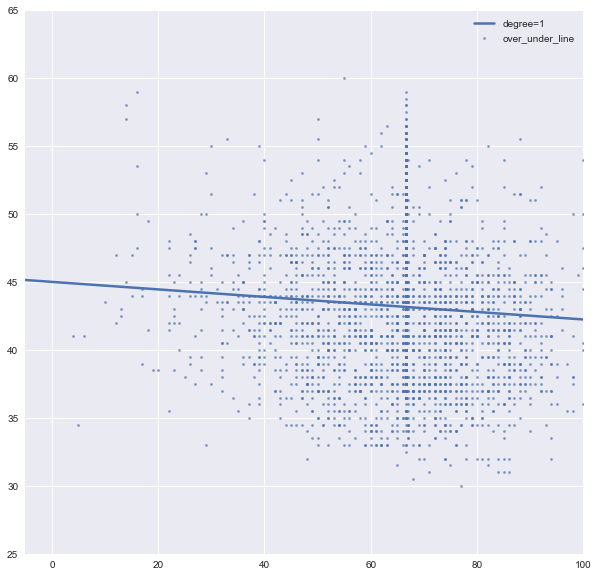

In [1039]:
poly_regression(reg_df.weather_humidity, reg_df.over_under_line, [1],-5,100, 25, 65,-15,150)

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.55
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           6.00e-06
Time:                        17:54:21   Log-Likelihood:                -11394.
No. Observations:                3841   AIC:                         2.279e+04
Df Residuals:                    3839   BIC:                         2.281e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               45.0086      0.406  

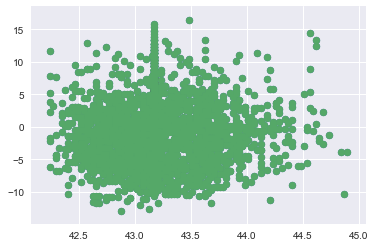

In [1040]:
regression_evaluation(reg_df.over_under_line, (reg_df.weather_humidity**1))

# VARIABLE 4 - WIND MPH

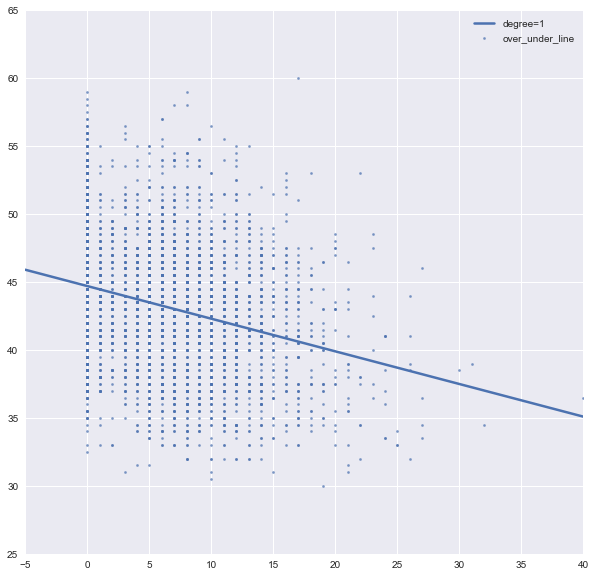

In [1041]:
poly_regression(reg_df.weather_wind_mph, reg_df.over_under_line, [1],-5,40, 25, 65,-10,60)

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     321.9
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           3.47e-69
Time:                        17:54:22   Log-Likelihood:                -11250.
No. Observations:                3841   AIC:                         2.250e+04
Df Residuals:                    3839   BIC:                         2.252e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               44.7007      0.111  

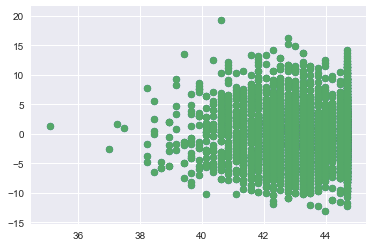

In [1042]:
regression_evaluation(reg_df.over_under_line, (reg_df.weather_wind_mph**1))

# VARIABLE 5 - Weather Temp

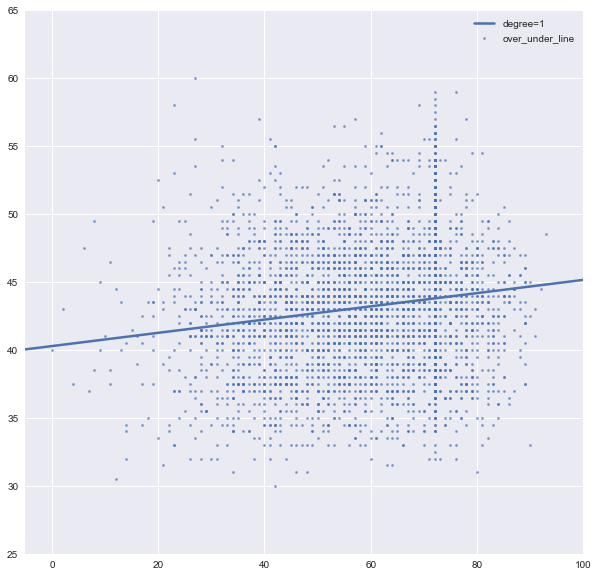

In [1043]:
poly_regression(reg_df.weather_temperature, reg_df.over_under_line, [1],-5,100, 25, 65,-10,110)

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     102.4
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           9.20e-24
Time:                        17:54:22   Log-Likelihood:                -11354.
No. Observations:                3841   AIC:                         2.271e+04
Df Residuals:                    3839   BIC:                         2.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  40.2849    

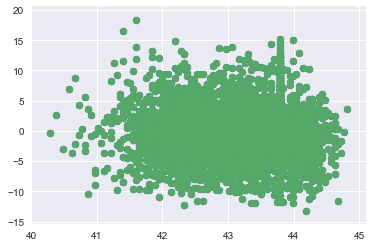

In [1044]:
regression_evaluation(reg_df.over_under_line, (reg_df.weather_temperature**1))

# ALL VARIABLES FOR OVER/UNDER

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1000.
Date:                Thu, 09 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:54:23   Log-Likelihood:                -9801.6
No. Observations:                3841   AIC:                         1.962e+04
Df Residuals:                    3835   BIC:                         1.965e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9184      0.567     31.616      0.0

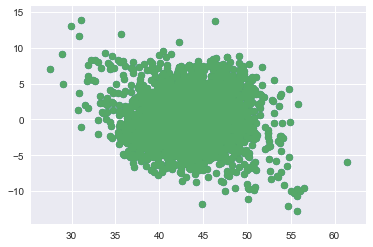

In [1045]:
regression_evaluation(reg_df.over_under_line, reg_df[['weather_wind_mph', 'weather_humidity', 'total_points_against', 'total_ppg','weather_temperature']].values)

# SPREAD 

# Last 4 Games win %

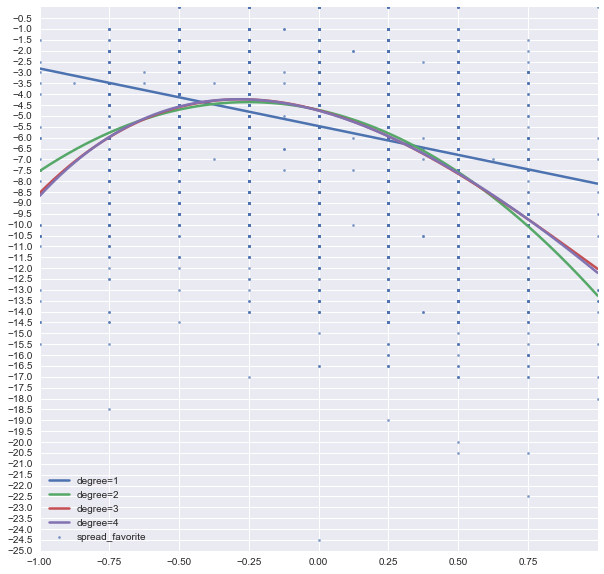

In [1046]:
poly_regression(reg_df.last_four_difference, reg_df.spread_favorite, [1,2,3,4],-1,1, -25, 0,-1,1)
plt.yticks(np.arange(-25,0,.5))
plt.xticks(np.arange(-1,1,.25));

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     326.0
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           5.11e-70
Time:                        17:54:24   Log-Likelihood:                -10023.
No. Observations:                3841   AIC:                         2.005e+04
Df Residuals:                    3839   BIC:                         2.006e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.4669 

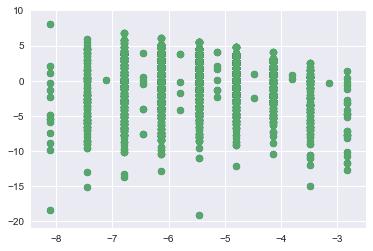

In [1047]:
regression_evaluation(reg_df.spread_favorite, (reg_df.last_four_difference**1))

# WIN % DIFF REJECTED DUE TO LOW HIGH CORRELATION WITH EXP WINS

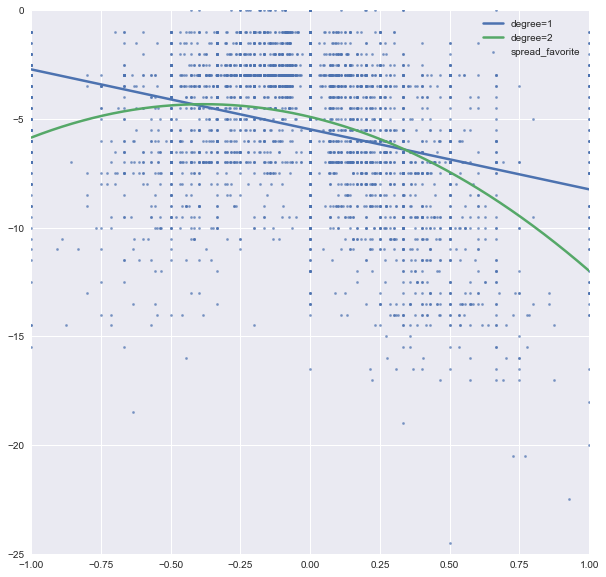

In [1048]:
poly_regression(reg_df.win_pct_diff, reg_df.spread_favorite, [1,2],-1,1, -25, 0,-1,1)

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     394.6
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           1.17e-83
Time:                        17:54:25   Log-Likelihood:                -9991.7
No. Observations:                3841   AIC:                         1.999e+04
Df Residuals:                    3839   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.4802      0.053   -103.916   

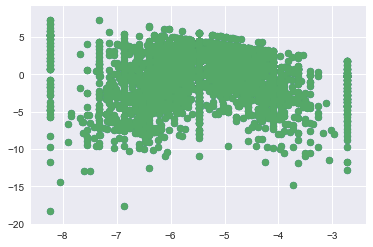

In [1049]:
regression_evaluation(reg_df.spread_favorite, (reg_df.win_pct_diff**1))

# First Variable- Home Favorite

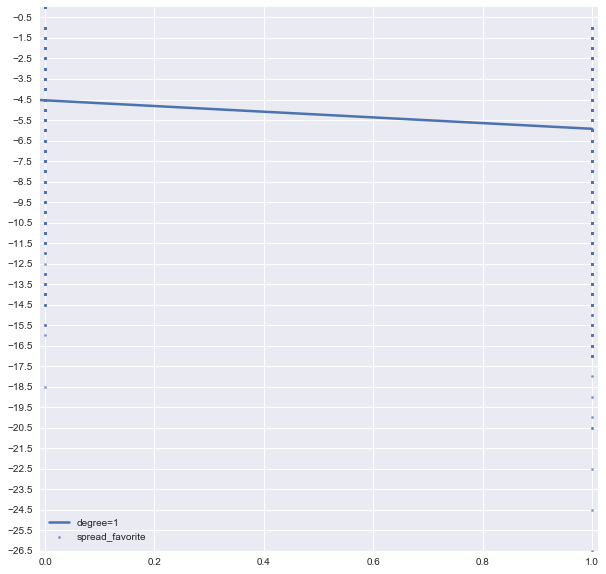

In [1050]:
poly_regression(reg_df.home_favorite, reg_df.spread_favorite, [1],-.01,1.01, -25, 0,-1,1)
plt.yticks(np.arange(-26.5,0,1));

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     151.9
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           2.90e-34
Time:                        17:54:26   Log-Likelihood:                -10105.
No. Observations:                3841   AIC:                         2.021e+04
Df Residuals:                    3839   BIC:                         2.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.5399      0.090    -50.634

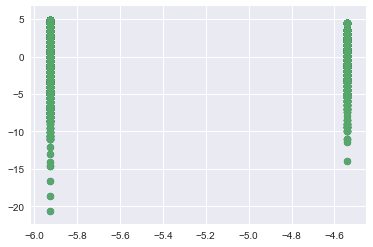

In [1051]:
regression_evaluation(reg_df.spread_favorite, (reg_df.home_favorite**1))

In [1052]:
# data = {"a":[2, 3, 5], "b":[2, 3, 5], "c":[2, 3, 5]}
# model = sm.ols(formula = 'a ~ np.power(b, 2) + b + c', data = reg_df).fit()

# SECOND VARIABLE - Exp Win Difference

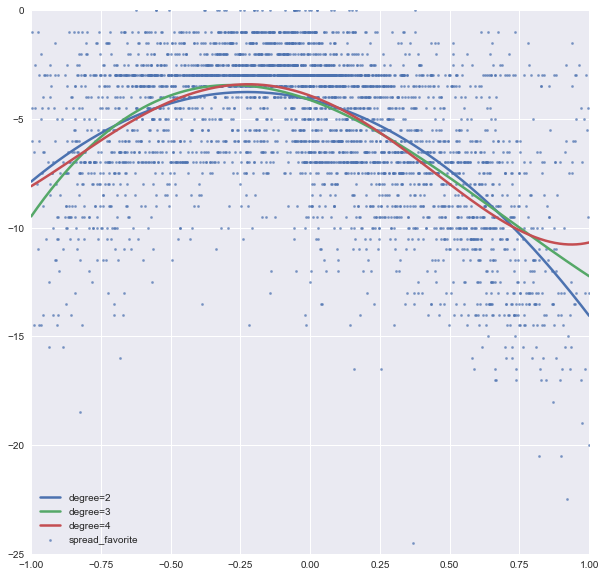

In [1053]:
poly_regression(reg_df.exp_win_difference, reg_df.spread_favorite, [2,3,4],-1,1, -25, 0,-1,1)

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     897.4
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          2.22e-177
Time:                        17:54:26   Log-Likelihood:                -9776.1
No. Observations:                3841   AIC:                         1.956e+04
Df Residuals:                    3839   BIC:                         1.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1326      0

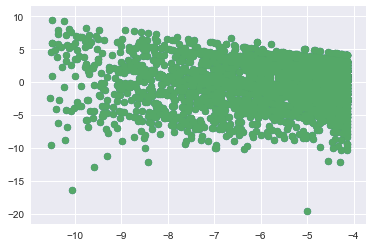

In [1054]:
regression_evaluation(reg_df.spread_favorite, (reg_df.exp_win_difference**2))

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     255.6
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          3.12e-151
Time:                        17:54:27   Log-Likelihood:                -9829.7
No. Observations:                3841   AIC:                         1.967e+04
Df Residuals:                    3837   BIC:                         1.969e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0249      0.069    -87.557      0.0

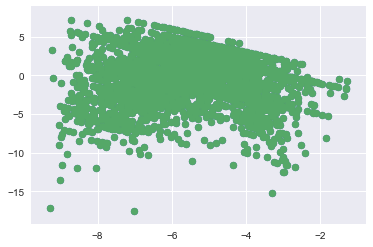

In [1055]:
regression_evaluation(reg_df.spread_favorite, reg_df[['last_four_difference', 'exp_win_difference', 'favorite_covered']].values)

# WEEK- REJECTED LOW PREDICTABILITY

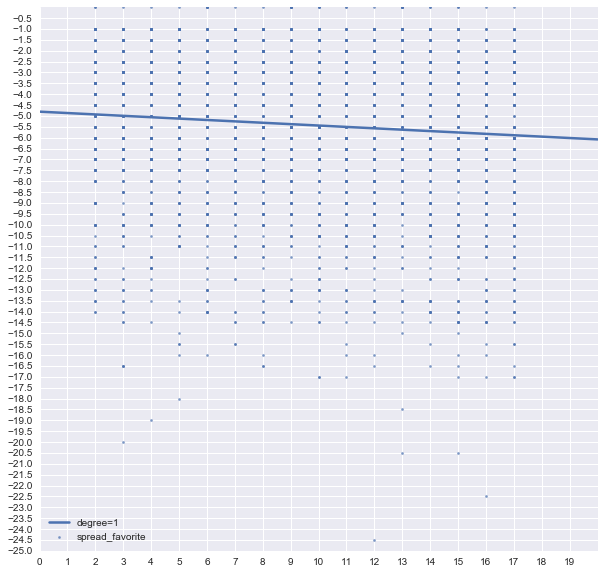

In [1056]:
poly_regression(reg_df.schedule_week, reg_df.spread_favorite, [1],0,20, -25, 0,0,25)
plt.yticks(np.arange(-25,0,.5))
plt.xticks(np.arange(0,20,1));

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     368.1
Date:                Fri, 10 Aug 2018   Prob (F-statistic):          1.22e-195
Time:                        10:18:36   Log-Likelihood:                -1441.0
No. Observations:                2332   AIC:                             2890.
Df Residuals:                    2328   BIC:                             2913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0124 

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


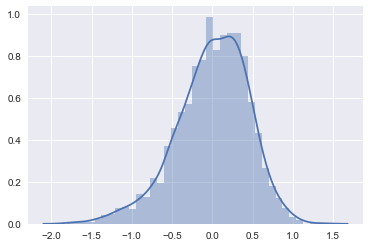

In [358]:
log_log_regression_evaluation(week5_df.spread_favorite, week5_df[['home_favorite', 'exp_win_difference','last_four_difference']])

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1010.
Date:                Fri, 10 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:58:05   Log-Likelihood:                 3235.6
No. Observations:                2332   AIC:                            -6459.
Df Residuals:                    2326   BIC:                            -6425.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7239 

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


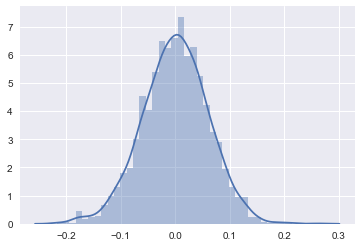

In [470]:
log_log_regression_evaluation(week5_df.over_under_line, week5_df[['weather_temperature', 'weather_wind_mph','weather_humidity', 'total_ppg', 'total_points_against']])

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


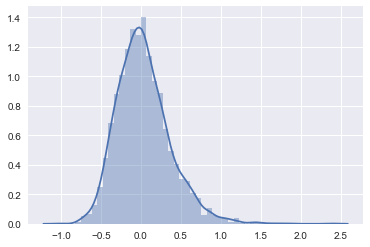

In [476]:
#log-log
y = .6648+.0326*np.log(week5_df.weather_temperature+1)-.0139*np.log(week5_df.weather_wind_mph+1)-.0118*np.log(week5_df.weather_humidity+1)+.4627*np.log(week5_df.total_ppg+1)+.3439*np.log(week5_df.total_points_against+1)
diff = y - np.log(week5_df.point_total+1)
sns.distplot(diff)

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


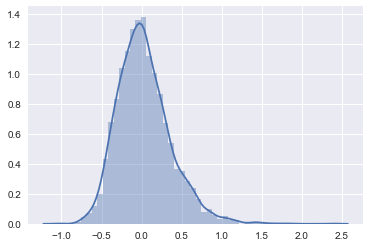

In [478]:
#log-linear
y = 3.0086+.0006*(week5_df.weather_temperature)-.0028*(week5_df.weather_wind_mph)-.0003*(week5_df.weather_humidity)+.0103*(week5_df.total_ppg)+.0074*(week5_df.total_points_against)
diff = y - np.log(week5_df.point_total+1)
sns.distplot(diff)

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


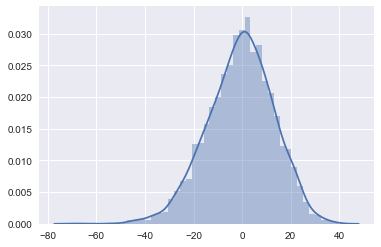

In [504]:
#linear
y = 8.5852+.0298*(week5_df.weather_temperature)-.113*(week5_df.weather_wind_mph)-.0103*(week5_df.weather_humidity)+.4529*(week5_df.total_ppg)+.3294*(week5_df.total_points_against)
diff = y - week5_df.point_total
sns.distplot(diff)

ou_df = week5_df[['over_under_line','over_under_result','point_total']]

In [510]:
y = 8.5852+.0298*(week5_df.weather_temperature)-.113*(week5_df.weather_wind_mph)-.0103*(week5_df.weather_humidity)+.4529*(week5_df.total_ppg)+.3294*(week5_df.total_points_against)
ou_df = week5_df[['over_under_line','over_under_result','point_total']]

ou_df['prediction']= y
ou_df['over_under_result'] = np.where(ou_df['over_under_result']=='over', 1, 0)

ou_df['good_prediction']=np.where((ou_df['prediction']<ou_df['over_under_line']) & (ou_df['over_under_result']==0),1,0)
ou_df['good_prediction']=np.where((ou_df['prediction']>ou_df['over_under_line']) & (ou_df['over_under_result']==1),1,ou_df['good_prediction'])

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [687]:
np.sum(ou_df.good_prediction)/len(ou_df)

0.5090032154340836

## Predict home and way point totals, from there we can derive spread and o/u

In [518]:
pd.set_option('display.max_columns', 1000)
week5_df.corr()

,schedule_season,schedule_week,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,point_total,score_difference,home_favorite,favorite_covered,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,home_points_for,home_points_against,away_points_for,away_points_against,h_games,a_games,home_win_pct,away_win_pct,win_pct_diff,h_ppg,h_papg,a_ppg,a_papg,home_pt_diff_pg,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,home_win_pct_last_4,away_win_pct_last_4,exp_win_difference,total_ppg,total_points_against,last_four_difference
schedule_season,1.000000,-0.001999,0.014470,0.331189,0.113061,-0.222340,-0.068401,0.039526,0.056750,0.070170,-0.011471,-0.068842,-0.036980,0.007593,0.003046,0.038746,0.002516,0.006730,0.048256,0.077455,0.079802,0.077693,0.081646,0.009292,0.008514,0.000462,-0.000687,0.000817,0.140759,0.158937,0.141551,0.159303,-0.000111,0.000130,-0.000173,0.001820,0.002821,-0.000708,-0.005887,-0.000722,0.195429,0.216731,0.003711
schedule_week,-0.001999,1.000000,-0.087865,-0.044495,-0.350360,0.014006,0.078472,-0.010523,-0.036356,-0.034099,0.017564,-0.013050,-0.037197,0.637521,0.634086,0.055684,0.633268,0.638734,0.056540,0.848180,0.884070,0.847985,0.884624,0.995689,0.995664,0.006579,-0.016146,0.016157,0.014071,0.003746,0.006345,0.037700,0.007555,-0.019024,0.019090,-0.001600,-0.022643,0.058714,0.046722,0.015033,0.014115,0.028310,0.008483
spread_favorite,0.014470,-0.087865,1.000000,-0.027486,0.058545,-0.002069,0.012550,-0.127483,0.150094,0.015407,-0.190503,-0.180816,0.101509,-0.235556,0.124199,-0.018259,0.141718,-0.256463,0.016740,-0.193011,-0.001021,0.040597,-0.158215,-0.087787,-0.090265,-0.229482,0.264427,-0.351215,-0.226854,0.152066,0.224174,-0.182171,-0.254010,0.270790,-0.376378,-0.262649,0.280093,-0.188394,0.210939,-0.386522,-0.000853,-0.021333,-0.285677
over_under_line,0.331189,-0.044495,-0.027486,1.000000,0.200052,-0.293958,-0.060153,0.204085,0.200516,0.295186,0.003943,-0.059935,-0.073602,0.061377,-0.113090,-0.011009,0.077504,-0.128558,0.030552,0.205775,0.108034,0.202259,0.083786,-0.040586,-0.039625,0.113449,0.136888,-0.016589,0.476907,0.314137,0.472284,0.268349,0.139336,0.164326,-0.018703,0.133886,0.151444,0.100701,0.108494,-0.013078,0.657060,0.396574,-0.005763
weather_temperature,0.113061,-0.350360,0.058545,0.200052,1.000000,-0.412407,-0.049344,-0.001395,0.081567,0.058163,-0.056667,-0.039864,-0.005278,-0.285188,-0.157589,-0.067115,-0.227415,-0.212240,-0.041167,-0.302831,-0.240951,-0.282022,-0.292691,-0.347986,-0.344670,-0.083160,-0.004109,-0.056242,-0.021137,0.130597,0.023390,0.017319,-0.096176,0.005632,-0.072773,-0.091159,0.006171,-0.059127,-0.009876,-0.069138,0.001659,0.100453,-0.035168
weather_wind_mph,-0.222340,0.014006,-0.002069,-0.293958,-0.412407,1.000000,0.010351,-0.085605,-0.111780,-0.143897,0.017243,0.028833,0.004037,0.014824,0.003588,-0.003845,-0.000564,0.017581,-0.015456,-0.029633,-0.051007,-0.016277,-0.000861,0.014308,0.012937,0.010601,-0.013025,0.016800,-0.081852,-0.130357,-0.057832,-0.029991,0.023686,-0.021900,0.032685,0.013226,-0.024048,0.015261,-0.014758,0.026565,-0.096642,-0.108951,0.021473
weather_humidity,-0.068401,0.078472,0.012550,-0.060153,-0.049344,0.010351,1.000000,-0.008048,-0.007527,-0.011364,-0.000415,-0.016670,-0.002997,0.027820,0.073145,0.020731,0.054714,0.043153,0.006452,0.050215,0.064712,0.062391,0.064618,0.079433,0.076630,-0.034114,0.018366,-0.037324,-0.037031,-0.011840,0.006690,-0.013405,-0.018630,0.013060,-0.022710,-0.017950,0.012035,-0.014375,0.015462,-0.021340,-0.020906,-0.017197,-0.021345
score_home,0.039526,-0.010523,-0.127483,0.204085,-0.001395,-0.085605,-0.008048,1.000000,-0.060579,0.689501,0.731667,0.215824,0.188181,0.160061,-0.172340,0.009657,-0.084506,0.074680,0.001498,0.134044,-0.050007,-0.024710,0.053854,-0.009122,-0.007229,0.205545,-0.096077,0.214523,0.267852,-0.092056,-0.026903,0.120858,0.245454,-0.094144,0.243136,0.242847,-0.104899,0.173021,-0.081051,0.247352,0.166139,0.020144,0.181663
score_away,0.

In [684]:
def test_regression(x, y, degree_range, xlim_min, xlim_max, ylim_min, ylim_max, alpha = .75,s = 5,width = 2.5):
    plt.figure(figsize = (10,10))
    
    split = train_test_split(x, y,test_size = 0.25, random_state = 42)
    print(split[0].features)
    X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
    x = X_train
    y = y_train
    plt.scatter(x, y, s = s, alpha = alpha)
    
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min,xlim_max)
    
    for degree in degree_range:
        poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
        poly_model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(xlim_min,xlim_max, 10000)
        yfit = poly_model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label = 'degree={}'.format(degree),linewidth=width)
    plt.legend(loc = 'best')


In [685]:
test_df = week5_df[week5_df.schedule_season>2010]


In [686]:
test_regression(test_df.a_papg, test_df.score_home, [1,2,3,4],10,35, 10,45)

AttributeError: 'Series' object has no attribute 'features'

<Figure size 720x720 with 0 Axes>

                            OLS Regression Results                            
Dep. Variable:             score_home   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     21.87
Date:                Fri, 10 Aug 2018   Prob (F-statistic):           3.51e-38
Time:                        12:32:13   Log-Likelihood:                -4983.0
No. Observations:                1352   AIC:                             9988.
Df Residuals:                    1341   BIC:                         1.005e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.6861    

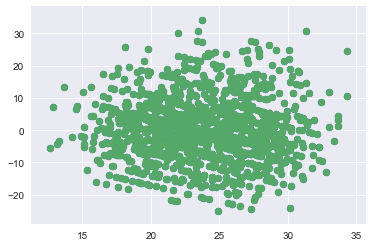

In [673]:
regression_evaluation(test_df.score_home,test_df[['spread_favorite','over_under_line','weather_wind_mph',
                                                  'home_favorite','h_ppg','a_papg','home_exp_win_pct',
                                                 'away_exp_win_pct','home_win_pct_last_4','away_win_pct_last_4']])

In [352]:
def log_linear_regression(x, y, degree_range, xlim_min, xlim_max, ylim_min, ylim_max,xfit1, xfit2, alpha = .75,s = 5,width = 2.5):
    #create figure and set size and axis lims
    plt.figure(figsize = (10,10))
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min,xlim_max)
    
    #split inputs into training and test sets
    split = train_test_split(x, np.log(np.abs(y)+1))
    X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
    x = X_train
    y = y_train
    plt.scatter(x, y, s = s, alpha = alpha)

    #conditional to plot points in diff color depending on game outcome
    if str(y) == str(reg_df.over_under_line):
        y1 = y[reg_df['over_under_result']=='over']
        y2 = y[reg_df['over_under_result']=='under']
        x1 = x[reg_df['over_under_result']=='over']
        x2 = x[reg_df['over_under_result']=='under']
        plt.scatter(x1, y1, s = s, alpha = alpha, color = 'green', label = 'Over')
        plt.scatter(x2, y2, s = s, alpha = .4, color = 'purple', label = 'Under')
    else:
        y1 = y[reg_df['favorite_covered']==1]
        y2 = y[reg_df['favorite_covered']==0]
        x1 = x[reg_df['favorite_covered']==1]
        x2 = x[reg_df['favorite_covered']==0]
        plt.scatter(x1, y1, s = s, alpha = alpha, color = 'green',label = 'Covered')
        plt.scatter(x2, y2, s = s, alpha = .4, color = 'purple', label ='No Cover')
    
    for degree in degree_range:
        poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
        poly_model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(xfit1,xfit2, 10000)
        yfit = poly_model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label = 'degree={}'.format(degree),linewidth=width)
    plt.legend(loc = 'best')

In [336]:
def log_log_regression(x, y, degree_range, xlim_min, xlim_max, ylim_min, ylim_max,xfit1, xfit2, alpha = .75,s = 5,width = 2.5):
    #create figure and set size and axis lims
    plt.figure(figsize = (10,10))
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min,xlim_max)
    
    #split inputs into training and test sets
    split = train_test_split(np.log(x+1), np.log(np.abs(y)+1))
    X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
    x = X_train
    y = y_train
    plt.scatter(x, y, s = s, alpha = alpha)

    #conditional to plot points in diff color depending on game outcome
    if str(y) == str(reg_df.over_under_line):
        y1 = y[reg_df['over_under_result']=='over']
        y2 = y[reg_df['over_under_result']=='under']
        x1 = x[reg_df['over_under_result']=='over']
        x2 = x[reg_df['over_under_result']=='under']
        plt.scatter(x1, y1, s = s, alpha = alpha, color = 'green', label = 'Over')
        plt.scatter(x2, y2, s = s, alpha = .4, color = 'purple', label = 'Under')
    else:
        y1 = y[reg_df['favorite_covered']==1]
        y2 = y[reg_df['favorite_covered']==0]
        x1 = x[reg_df['favorite_covered']==1]
        x2 = x[reg_df['favorite_covered']==0]
        plt.scatter(x1, y1, s = s, alpha = alpha, color = 'green',label = 'Covered')
        plt.scatter(x2, y2, s = s, alpha = .4, color = 'purple', label ='No Cover')
    
    for degree in degree_range:
        poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
        poly_model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(xfit1,xfit2, 10000)
        yfit = poly_model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label = 'degree={}'.format(degree),linewidth=width)
    plt.legend(loc = 'best')

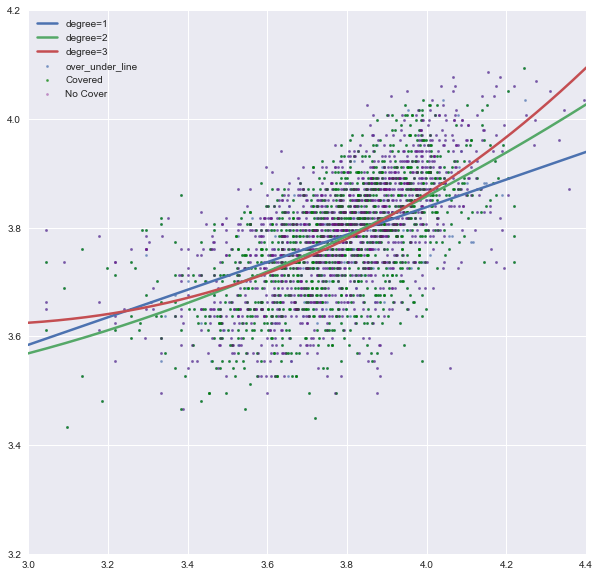

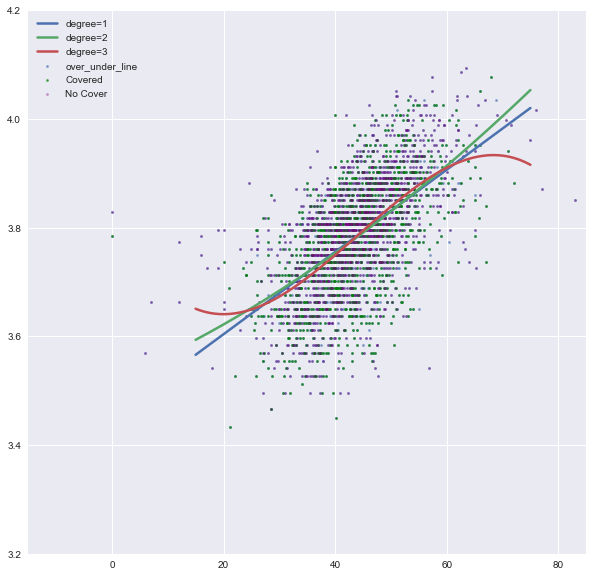

In [337]:
#poly_regression((reg_df.total_ppg), reg_df.over_under_line, [1,2],15,85, 25, 65,10,150)
log_log_regression(reg_df.total_ppg, reg_df.over_under_line, [1,2,3],3,4.4,3.2,4.2,0,5)
log_linear_regression(reg_df.total_ppg, reg_df.over_under_line, [1,2,3],-15,85,3.2,4.2,15,75)#log-linear reg, change logx to x in function

In [319]:
def log_log_regression_evaluation(target, X_list):
    split = train_test_split((np.log(np.abs(X_list)+1)), np.log(np.abs(target)+1))
    X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
    X = X_train
    target = y_train
    
    X2 = sm.add_constant(X)
    est = sm.OLS(target, X2)
    est2 = est.fit()
    
    y_predicted = est2.fittedvalues
    y_actual = target
    
    log_rmse = math.sqrt(mean_squared_log_error(y_actual, y_predicted))
    residuals = y_actual-y_predicted

    #plt.scatter(y_predicted,residuals)
    print(est2.summary())
    sns.distplot(residuals)
    print('Log RMSE=' + str(log_rmse))

In [320]:
def log_linear_regression_evaluation(target,X_list):
    split = train_test_split(X_list, np.log(np.abs(target)+1))## log-linear eval
    X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
    X = X_train
    target = y_train
    
    X2 = sm.add_constant(X)
    est = sm.OLS(target, X2)
    est2 = est.fit()
    
    y_predicted = est2.fittedvalues
    y_actual = target
    
    log_rmse = math.sqrt(mean_squared_log_error(y_actual, y_predicted))
    residuals = y_actual-y_predicted

    #plt.scatter(y_predicted,residuals)
    print(est2.summary())
    sns.distplot(residuals)
    print('Log RMSE=' + str(log_rmse))

                            OLS Regression Results                            
Dep. Variable:        spread_favorite   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     495.6
Date:                Fri, 10 Aug 2018   Prob (F-statistic):          1.99e-101
Time:                        10:00:27   Log-Likelihood:                -2044.0
No. Observations:                2880   AIC:                             4092.
Df Residuals:                    2878   BIC:                             4104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3998      0

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


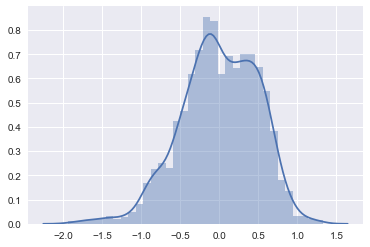

In [321]:
log_log_regression_evaluation(reg_df.spread_favorite, reg_df.exp_win_difference)

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


7.375

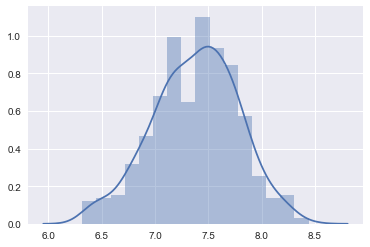

In [299]:
t = [9,9,9,9,9,9,1,4]
sns.distplot(n_samples(t,50,500))
np.sum(t)/len(t)

## all variable over/under log_reg eval

In [1341]:
test_df = reg_df[(reg_df.schedule_week>4)]
test_df[test_df.weather_detail=='DOME']
test_df['dome'] = np.where(test_df['weather_detail']=='DOME', 1, 0)

,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,...,away_pt_diff_pg,pt_diff_pg,home_exp_win_pct,away_exp_win_pct,home_win_pct_last_4,away_win_pct_last_4,exp_win_difference,total_ppg,total_points_against,last_four_difference
5431,2002,5,Atlanta Falcons,Tampa Bay Buccaneers,ATL,-2.5,38.5,DOME,72.0,0.0,...,14.750,-7.083,0.881827,0.988403,0.25,0.750,-0.106576,52.17,29.75,-0.500
5437,2002,5,Indianapolis Colts,Cincinnati Bengals,IND,-13.5,43.0,DOME,72.0,0.0,...,-24.000,29.000,0.810542,0.000151,0.50,0.000,0.810391,27.08,46.08,0.500
5440,2002,5,New Orleans Saints,Pittsburgh Steelers,NO,-3.0,43.5,DOME,72.0,0.0,...,-8.667,14.167,0.785183,0.080456,0.75,0.250,0.704727,43.42,46.58,0.500
5448,2002,6,Houston Texans,Buffalo Bills,BUF,-7.0,44.0,DOME,72.0,0.0,...,-3.400,-9.100,0.015830,0.347696,0.00,0.500,-0.331866,43.10,59.00,-0.500
5449,2002,6,Indianapolis Colts,Baltimore Ravens,IND,-6.5,42.0,DOME,72.0,0.0,...,-3.000,8.500,0.820127,0.291326,0.50,0.500,0.528801,39.75,37.25,0.000
5450,2002,6,Minnesota Vikings,Detroit Lions,MIN,-4.5,49.0,DOME,72.0,0.0,...,-13.250,2.750,0.102316,0.051047,0.00,0.250,0.051269,46.00,69.75,-0.250
5454,2002,6,St. Louis Rams,Oakland Raiders,OAK,-7.0,49.0,DOME,72.0,0.0,...,18.000,-28.200,0.052315,0.974734,0.00,0.750,-0.922419,55.30,47.50,-0.750
5460,2002,7,Atlanta Falcons,Carolina Panthers,ATL,-4.0,35.5,DOME,72.0,0.0,...,4.500,-1.300,0.719684,0.826482,0.50,0.250,-0.106798,37.00,29.30,0.250
5463,2002,7,Detroit Lions,Chicago Bears,CHI,-3.0,44.5,DOME,72.0,0.0,...,-4.000,-8.000,0.066413,0.277259,0.25,0.000,-0.210845,44.20,60.20,0.250
5467,2002,7,New Orleans Saints,San Francisco 49ers,NO,-1.5,48.5,DOME,72.0,0.0,...,6.800,0.033,0.817259,0.873095,0.75,0.750,-0.055837,54.00,40.37,0.000


                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     839.6
Date:                Thu, 09 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:57:29   Log-Likelihood:                 3162.7
No. Observations:                2332   AIC:                            -6311.
Df Residuals:                    2325   BIC:                            -6271.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7245      0.057     12.804      0.0

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



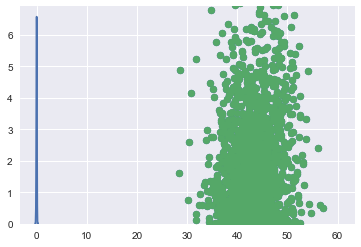

In [1352]:
log_regression_evaluation(test_df.over_under_line, test_df[['dome','weather_wind_mph', 'weather_humidity', 'total_points_against', 'total_ppg','weather_temperature']].values)
regression_evaluation(test_df.over_under_line, test_df[['dome','weather_wind_mph', 'weather_humidity', 'total_points_against', 'total_ppg','weather_temperature']].values)


                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     2218.
Date:                Thu, 09 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:57:30   Log-Likelihood:                -10529.
No. Observations:                3841   AIC:                         2.106e+04
Df Residuals:                    3839   BIC:                         2.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1329      0.326     86.404      0.0

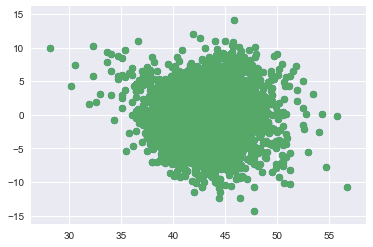

In [1353]:
regression_evaluation(reg_df.over_under_line, reg_df.total_ppg)

                            OLS Regression Results                            
Dep. Variable:        over_under_line   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1575.
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          4.17e-275
Time:                        19:23:01   Log-Likelihood:                 2900.8
No. Observations:                2880   AIC:                            -5798.
Df Residuals:                    2878   BIC:                            -5786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4158      0.009    385.999      0.0

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



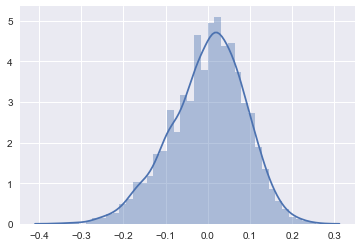

In [1255]:
log_regression_evaluation(reg_df.over_under_line, reg_df.total_ppg)

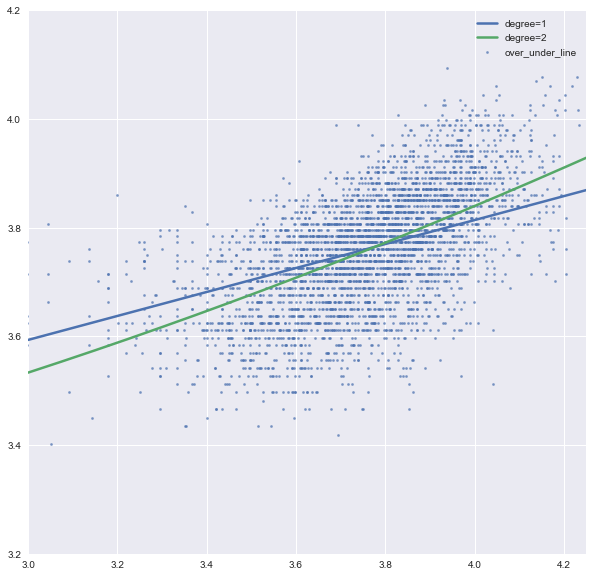

In [1062]:
log_log_regression(reg_df.total_ppg,reg_df.over_under_line,[1,2],3,4.25,3.2,4.2,0,5)